In [5]:
import pandas as pd
import os

In [2]:
#merging 12 months of sales data into a single file

In [30]:
df = pd.read_csv("Sales_October_2019.csv") #reading single month data

files = [file for file in os.listdir('./Sales_Data')] #listing all files in the folder that is 12 months data

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv",index=False) #file saved in folder consisting combined data of 12 months

In [31]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [32]:
#read in updated dataframe

In [33]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [34]:
#cleaning the data

In [35]:
nan_df = all_data[all_data.isna().any(axis=1)] 
nan_df.head() #to drop rows with NaN

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [36]:
temp_df = all_data[all_data['Order Date'].str[0:2]=='Or'] #filtering all data with text in date column
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [37]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or'] #removing all data with or in date field

In [38]:
#converting columns to relevant dtypes

In [39]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #making int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])#making float

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [40]:
#augmenting data with specific columns

In [41]:
#adding a month column from the date column

In [42]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [43]:
#adding a sales column

In [44]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [45]:
#what was the best month for sales? how much was earned that month?

In [46]:
results = all_data.groupby('Month').sum()

C:\Users\Nirav Shah\AppData\Local\Temp\ipykernel_4152\675579350.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('Month').sum()


<function matplotlib.pyplot.show(close=None, block=None)>

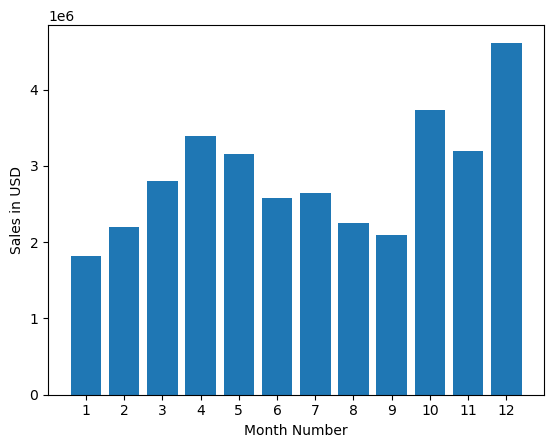

In [47]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months,results['Sales'])

plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month Number')

plt.show

In [48]:
#december was the best month of sales

In [49]:
#what city had the highest number of sales?

In [50]:
#adding a city column (using apply method)

In [51]:
#all_data = all_data.drop(columns='Column') #deleting a column

In [52]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1] #for 2 cities with same name

all_data['City'] = all_data['Purchase Address'].apply(lambda x : get_city(x) + ' (' + get_state(x) + ')')


all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [53]:
results = all_data.groupby('City').sum()
results

C:\Users\Nirav Shah\AppData\Local\Temp\ipykernel_4152\2386508471.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('City').sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


<function matplotlib.pyplot.show(close=None, block=None)>

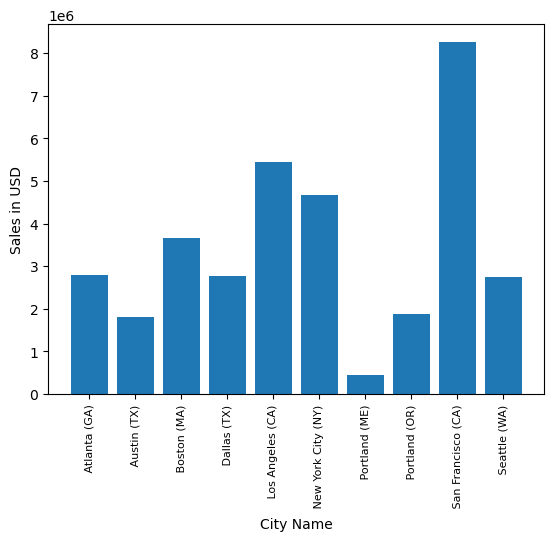

In [55]:
#using matplotlib
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities,results['Sales'])

plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD')
plt.xlabel('City Name')

plt.show

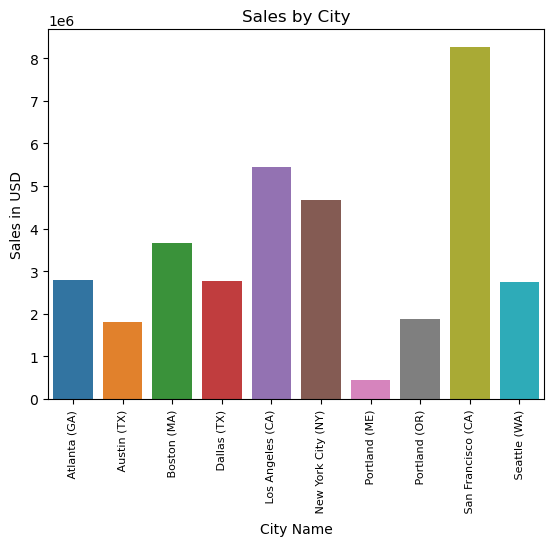

In [57]:
#using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('City')]

# Create a bar plot
sns.barplot(x=cities, y=results['Sales'])

# Set labels and title
plt.xlabel('City Name')
plt.ylabel('Sales in USD')
plt.title('Sales by City')

# Rotate x-axis labels for better visibility
plt.xticks(rotation='vertical', size=8)

# Show the plot
plt.show()

In [59]:
#san francisco is the city with best sales

In [60]:
#what time should we display advertisements to maximise likelihood of customer's buying product

In [61]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date']) #converting to date and time format

In [62]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


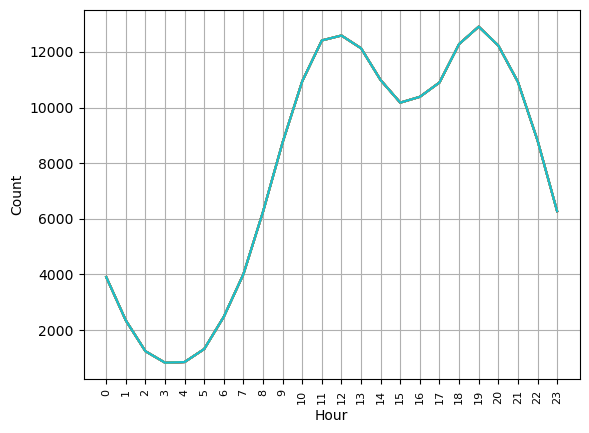

In [63]:
#using matplotlib
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())

plt.xticks(hours, rotation='vertical', size=8)
plt.ylabel('Count')
plt.xlabel('Hour')
plt.grid()

plt.show()

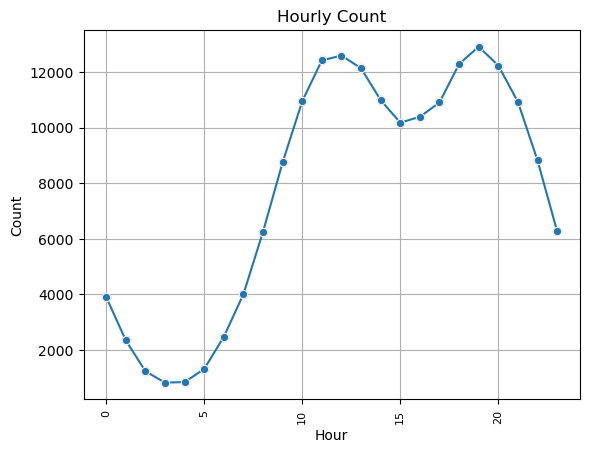

In [64]:
#using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by 'Hour' and count the occurrences
hourly_counts = all_data.groupby('Hour').size().reset_index(name='Count')

# Create a line plot
sns.lineplot(x='Hour', y='Count', data=hourly_counts, marker='o')

# Create a scatter plot to show individual points
sns.scatterplot(x='Hour', y='Count', data=hourly_counts, color='red', marker='o', s=50)

# Set labels and title
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Hourly Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation='vertical', size=8)

# Add gridlines
plt.grid()

# Show the plot
plt.show()

In [65]:
#peaks at 11 AM to 12 PM and 7 PM so around 10 AM and 6 PM is a good time for advertisements

In [66]:
#what products are most often sold together?

In [67]:
all_data.head() #same order ID means bought together

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [68]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
#grouping products bought together

df = df[['Order ID', 'Grouped']].drop_duplicates() #removing duplicate order types

df.head()

C:\Users\Nirav Shah\AppData\Local\Temp\ipykernel_4152\2525466575.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [69]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [70]:
#what products sold the most? why do u think were they sold the most?

C:\Users\Nirav Shah\AppData\Local\Temp\ipykernel_4152\2002104001.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered  = product_group.sum()['Quantity Ordered']


<function matplotlib.pyplot.show(close=None, block=None)>

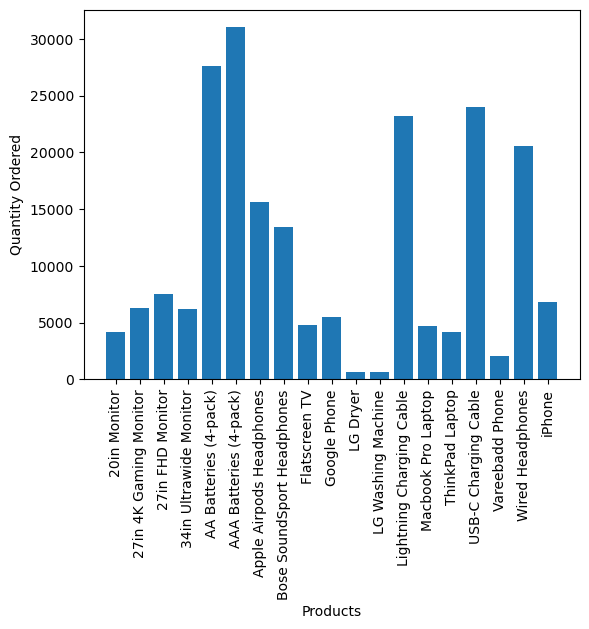

In [71]:
#using matplotlib
product_group = all_data.groupby('Product')

quantity_ordered  = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)

plt.xticks(products, rotation='vertical')
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.show

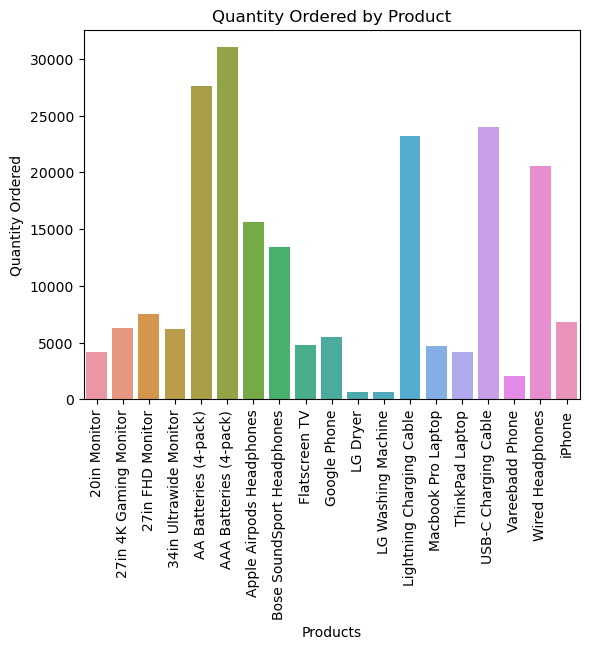

In [73]:
#using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by 'Product' and sum the quantity ordered
product_group = all_data.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum().reset_index()

# Create a bar plot
sns.barplot(x='Product', y='Quantity Ordered', data=quantity_ordered)

# Set labels and title
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Ordered by Product')

# Rotate x-axis labels for better visibility
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

In [74]:
#AAA batteries were sold the most. cheaper and used more often.

In [75]:
#overlaying graph with price to find correlation if purchase was affected by price

In [76]:
prices = all_data.groupby('Product').mean()['Price Each']

print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


C:\Users\Nirav Shah\AppData\Local\Temp\ipykernel_4152\2375809553.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']


C:\Users\Nirav Shah\AppData\Local\Temp\ipykernel_4152\2020142558.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']


TypeError: unhashable type: 'numpy.ndarray'

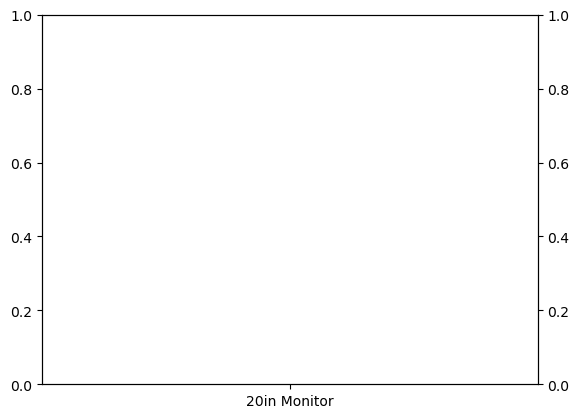

In [77]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered", color='g')
ax2.set_ylabel("Price ($)", color='b')
ax1.set_xticklabels(products, rotation='vertical')

plt.show()

In [ ]:
#therefore price and purchase are related